A startup with a brilliant business idea is aiming to get its operations up and running. From humble beginnings, the company proves the worthiness of its model and products, steadily growing thanks to the generosity of friends, family, and the founders' own financial resources. Over time, its customer base begins to grow, and the business begins to expand its operations and its aims. Before long, the company has risen through the ranks of its competitors to become highly valued, opening the possibilities for future expansion to include new offices, employees, and even an initial public offering (IPO).

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from wordcloud import WordCloud

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format
## Function for providing summary in dataframe
%matplotlib inline

def funding_information(data,name):
    company = data[data['name'] == name]
    print ("Company : ", name)
    print ("Total Funding : ", company.funding_total_usd.values[0] , " $")
    print ("Seed Funding : ", company.seed.values[0] , " $")
    print ("Angle Funding :", company.angel.values[0] , " $")
    print ("Grant Funding : ",company.grant.values[0] , " $")
    print ("Product Crowd Funding : ",company.product_crowdfunding.values[0] , " $")
    print ("Equity Crowd Funding : ",company.equity_crowdfunding.values[0] , " $")
    print ("Undisclode Funding : ", company.undisclosed.values[0] , " $")
    print ("Convertible Note : ", company.convertible_note.values[0] , " $")
    print ("Debt Financing : ", company.debt_financing.values[0] , " $")
    print ("Private Equity : ",company.private_equity.values[0] , " $")
    print ("PostIPO Equity : ",company.post_ipo_equity.values[0] , " $")
    print ("PostIPO Debt : ",company.post_ipo_debt.values[0] , " $")
    print ("Secondary Market : ",company.secondary_market.values[0] , " $")
    print ("Venture Funding : ",company.venture.values[0] , " $")
    print ("Round A funding : ",company.round_A.values[0] , " $")
    print ("Round B funding : ",company.round_B.values[0] , " $")
    print ("Round C funding : ",company.round_C.values[0] , " $")
    print ("Round D funding : ",company.round_D.values[0] , " $")
    print ("Round E funding : ",company.round_E.values[0] , " $")
    print ("Round F funding : ",company.round_F.values[0] , " $")
    print ("Round G funding : ",company.round_G.values[0] , " $")
    print ("Round H funding : ",company.round_H.values[0] , " $")

def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = [     ]
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count


def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=750, 
                      background_color=color, 
                      max_words=50,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

In [2]:
data = pd.read_csv("D:/mit wpu/sem 3/ml mini project/investments.csv",encoding = "ISO-8859-1")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
permalink               49438 non-null object
name                    49437 non-null object
homepage_url            45989 non-null object
category_list           45477 non-null object
 market                 45470 non-null object
 funding_total_usd      49438 non-null object
status                  48124 non-null object
country_code            44165 non-null object
state_code              30161 non-null object
region                  44165 non-null object
city                    43322 non-null object
funding_rounds          49438 non-null float64
founded_at              38554 non-null object
founded_month           38482 non-null object
founded_quarter         38482 non-null object
founded_year            38482 non-null float64
first_funding_at        49438 non-null object
last_funding_at         49438 non-null object
seed                    49438 non-null float64
venture       

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [5]:
data.venture.unique() 

array([      0., 4000000., 7000000., ..., 2686600., 1587301.,      nan])

In [6]:
data.head()

permalink                name  \
0            /organization/waywire            #waywire   
1  /organization/tv-communications  &TV Communications   
2    /organization/rock-your-paper   'Rock' Your Paper   
3   /organization/in-touch-network   (In)Touch Network   
4   /organization/r-ranch-and-mine  -R- Ranch and Mine   

                    homepage_url  \
0         http://www.waywire.com   
1          http://enjoyandtv.com   
2   http://www.rockyourpaper.org   
3  http://www.InTouchNetwork.com   
4                            NaN   

                                       category_list        market   \
0         |Entertainment|Politics|Social Media|News|          News    
1                                            |Games|         Games    
2                             |Publishing|Education|    Publishing    
3  |Electronics|Guides|Coffee|Restaurants|Music|i...   Electronics    
4                      |Tourism|Entertainment|Games|       Tourism    

   funding_total_usd      status country_code state_code         region  ...  \
0          17,50,000    acquired          USA         NY  New York City  ...   
1          40,00,000   operating          USA         CA    Los Angeles  ...   
2             40,000   operating          EST        NaN        Tallinn  ...   
3          15,00,000   operating          GBR        NaN         London  ...   
4             60,000   operating          USA         TX         Dallas  ...   

  secondary_market  product_crowdfunding round_A round_B round_C  round_D  \
0             0.00                  0.00    0.00    0.00    0.00     0.00   
1             0.00                  0.00    0.00    0.00    0.00     0.00   
2             0.00                  0.00    0.00    0.00    0.00     0.00   
3             0.00                  0.00    0.00    0.00    0.00     0.00   
4             0.00                  0.00    0.00    0.00    0.00     0.00   

  round_E round_F  round_G  round_H  
0    0.00    0.00     0.00     0.00  
1    0.00    0.00     0.00     0.00  
2    0.00    0.00     0.00     0.00  
3    0.00    0.00     0.00     0.00  
4    0.00    0.00     0.00     0.00  

[5 rows x 39 columns]

In [7]:
data = data[~data.name.isna()]

Storing only data after removeing null values

In [8]:
print( data.columns.values )

['permalink' 'name' 'homepage_url' 'category_list' ' market '
 ' funding_total_usd ' 'status' 'country_code' 'state_code' 'region'
 'city' 'funding_rounds' 'founded_at' 'founded_month' 'founded_quarter'
 'founded_year' 'first_funding_at' 'last_funding_at' 'seed' 'venture'
 'equity_crowdfunding' 'undisclosed' 'convertible_note' 'debt_financing'
 'angel' 'grant' 'private_equity' 'post_ipo_equity' 'post_ipo_debt'
 'secondary_market' 'product_crowdfunding' 'round_A' 'round_B' 'round_C'
 'round_D' 'round_E' 'round_F' 'round_G' 'round_H']


In [9]:
data.rename(columns={' funding_total_usd ': "funding_total_usd",
                    ' market ': "market"},inplace=True)

there some space , so we removed it

In [10]:
data['status'].value_counts()

operating    41829
acquired      3692
closed        2602
Name: status, dtype: int64

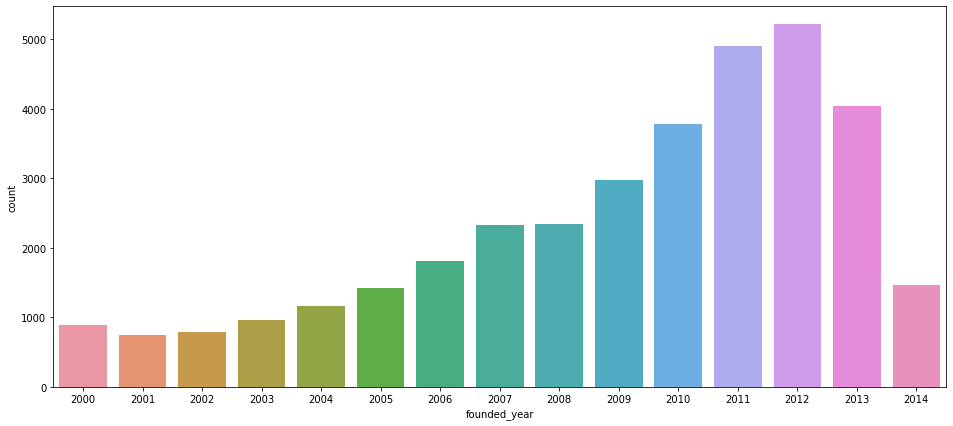

In [11]:
df_new = data[data['founded_year'] >= 2000]
df_new['founded_year'] = df_new['founded_year'].astype(int)
plt.figure(figsize = (16,7))
sns.countplot(x = 'founded_year', data = df_new)
plt.show()

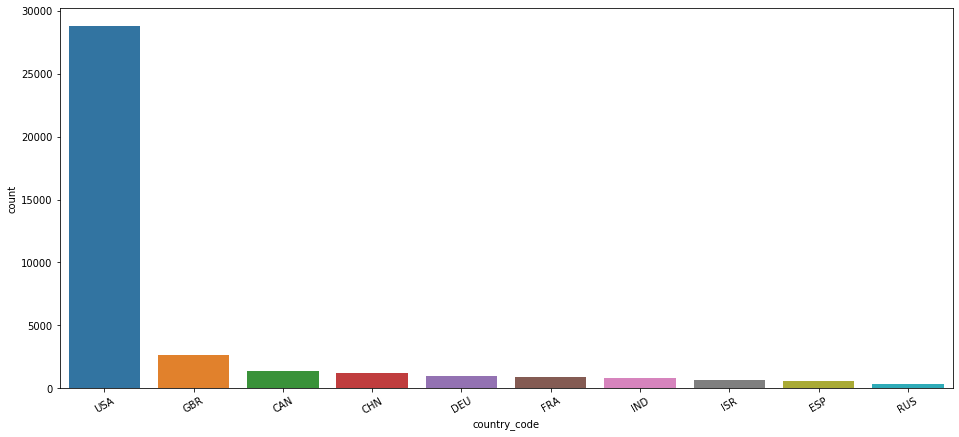

In [12]:
plt.figure(figsize=(16,7))
g = sns.countplot(x ='country_code', data = data, order=data['country_code'].value_counts().iloc[:10].index)
plt.xticks(rotation=30)
plt.show()

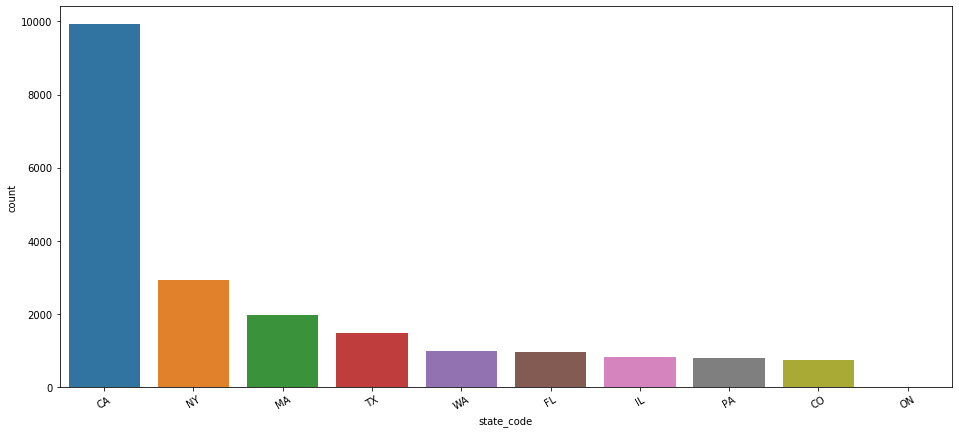

In [13]:
df_USA = data[(data['country_code'] =='USA')]
plt.figure(figsize=(16,7))
g = sns.countplot(x ='state_code', data = df_USA, order=data['state_code'].value_counts().iloc[:10].index)
plt.xticks(rotation=30)
plt.show()

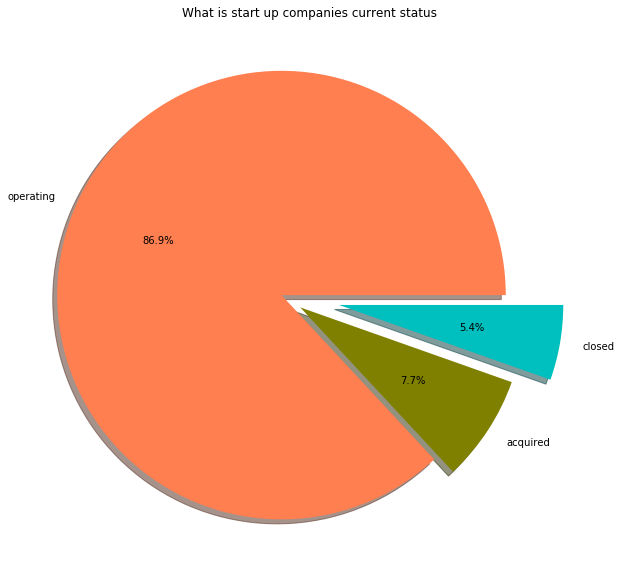

In [14]:
plt.rcParams['figure.figsize'] = 10,10
labels = data['status'].value_counts().index.tolist()
sizes = data['status'].value_counts().tolist()
explode = (0, 0.1, 0.26)
colors = ['coral','olive','c']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True)# startangle=10)
plt.axis('equal')

plt.title("What is start up companies current status")
plt.show()

In [15]:
len(data['market'].unique())

754

In [16]:
data['market'].value_counts()[:10]

 Software                4620
 Biotechnology           3688
 Mobile                  1983
 E-Commerce              1805
 Curated Web             1655
 Enterprise Software     1280
 Health Care             1207
 Clean Technology        1200
 Games                   1182
 Hardware + Software     1081
Name: market, dtype: int64

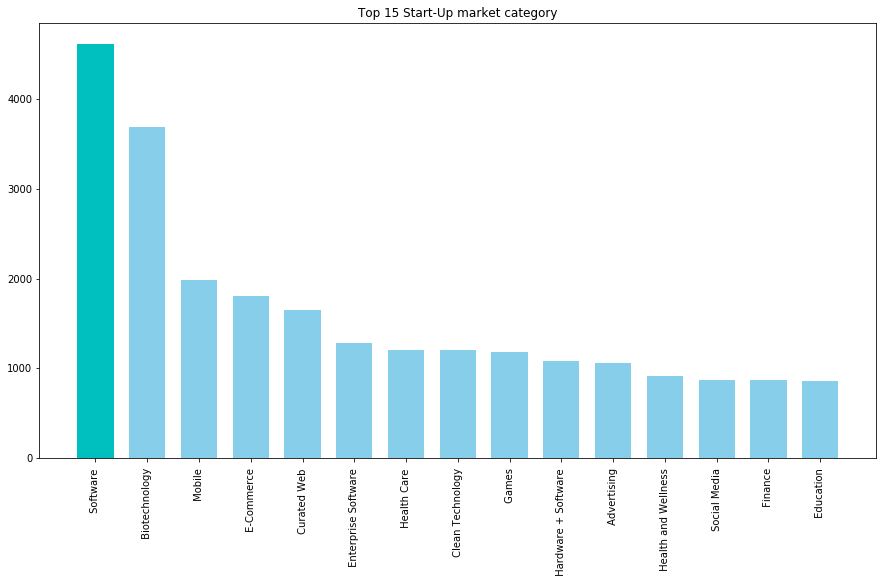

In [17]:
plt.rcParams['figure.figsize'] = 15,8

height = data['market'].value_counts()[:15].tolist()
bars =  data['market'].value_counts()[:15].index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= ['c']+['skyblue']*30)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.title("Top 15 Start-Up market category")
plt.show()

In [18]:
set_keywords = set()
for liste_keywords in data['category_list'].str.split('|').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)
#_________________________
# remove null chain entry
set_keywords.remove('')

In [19]:
keyword_occurences, dum = count_word(data, 'category_list', set_keywords)

In [20]:
keyword_occurences1, dum = count_word(data, 'market', set_keywords)

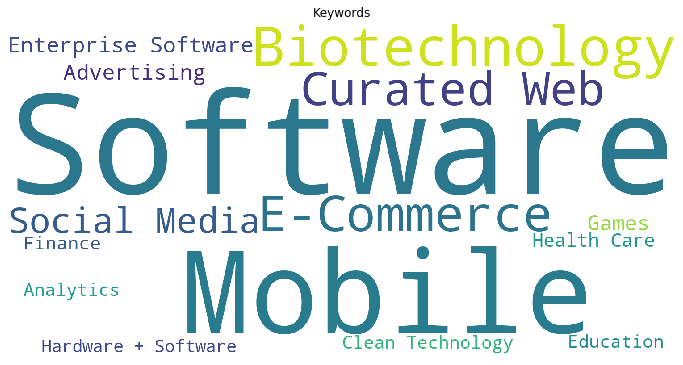

In [21]:
makeCloud(keyword_occurences[0:15],"Keywords","white")

In [22]:
#makeCloud(keyword_occurences1[0:15],"Keywords","White")

In [23]:
data['funding_total_usd'].head()

0     17,50,000 
1     40,00,000 
2        40,000 
3     15,00,000 
4        60,000 
Name: funding_total_usd, dtype: object

In [24]:

data['funding_total_usd'] = data['funding_total_usd'].str.replace(',', '')
data['funding_total_usd'] = data['funding_total_usd'].str.replace('-', '')
data['funding_total_usd'] = data['funding_total_usd'].str.replace(' ', '')

data['funding_total_usd'] = pd.to_numeric(data['funding_total_usd'], errors='coerce')

In [25]:
data['funding_total_usd'].head()

0   1750000.00
1   4000000.00
2     40000.00
3   1500000.00
4     60000.00
Name: funding_total_usd, dtype: float64

In [26]:
data['market'].head()

0            News 
1           Games 
2      Publishing 
3     Electronics 
4         Tourism 
Name: market, dtype: object

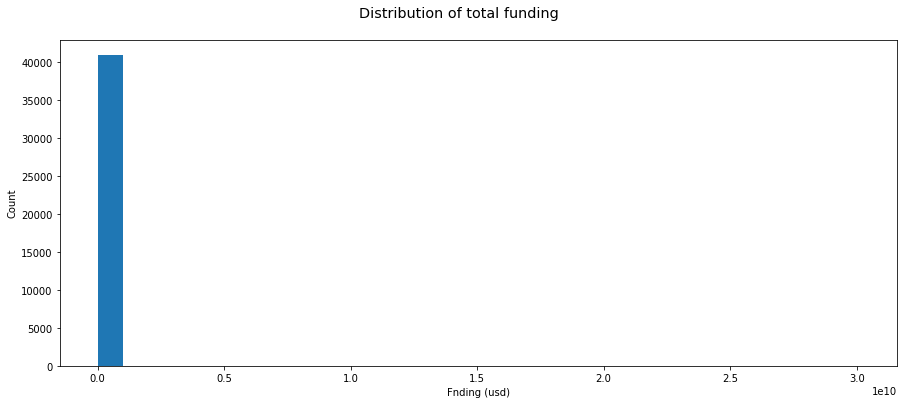

In [27]:
plt.rcParams['figure.figsize'] = 15,6
plt.hist(data['funding_total_usd'].dropna(), normed=False, bins=30)
plt.ylabel('Count')
plt.xlabel('Fnding (usd)')
plt.title("Distribution of total funding ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [28]:
Q1 = data['funding_total_usd'].quantile(0.25)
Q3 = data['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)

In [29]:
without_outlier = data[(data['funding_total_usd'] > lower_bound ) & (data['funding_total_usd'] < upper_bound)]

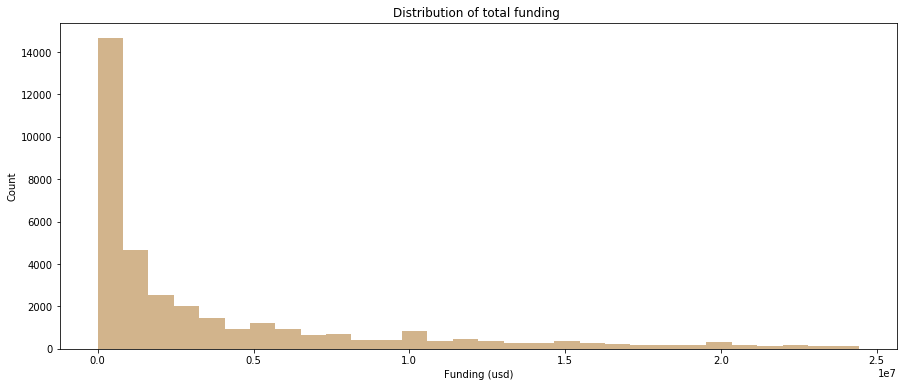

In [30]:
plt.rcParams['figure.figsize'] = 15,6
plt.hist(without_outlier['funding_total_usd'].dropna(), bins=30,color = 'tan' )

plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Distribution of total funding ")
plt.show()

In [31]:
Facebook_total_funding = data['funding_total_usd'][data['name']=="Facebook"].values[0]
Uber_total_funding = data['funding_total_usd'][data['name']=="Uber"].values[0]
Alibaba_total_funding = data['funding_total_usd'][data['name']=="Alibaba"].values[0]
Cloudera_total_funding = data['funding_total_usd'][data['name']=="Cloudera"].values[0]

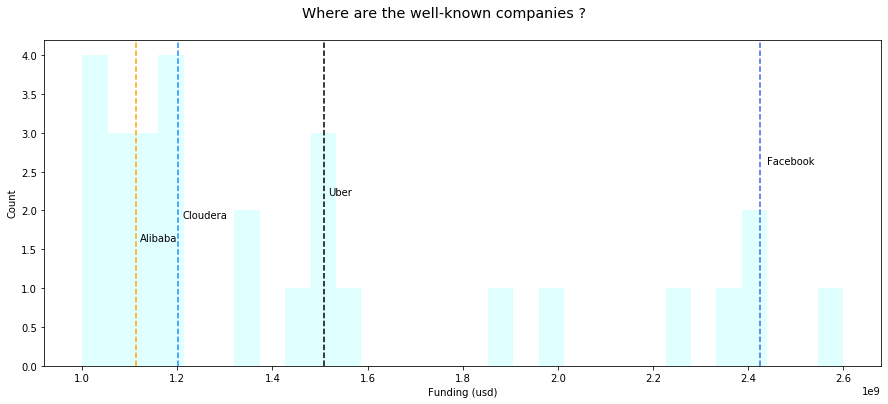

In [32]:
plt.rcParams['figure.figsize'] = 15,6

plt.hist(data['funding_total_usd'][(data['funding_total_usd'] >= 1000000000)&(data['funding_total_usd'] <= 3000000000)].dropna(), bins=30,color = 'lightcyan' )
plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Where are the well-known companies ? ", fontdict=None, position= [0.48,1.05], size = 'x-large')

plt.axvline(Facebook_total_funding,color='royalblue',linestyle ="--")
plt.text(Facebook_total_funding+15000000, 2.6,"Facebook")

plt.axvline(Uber_total_funding,color='black',linestyle ="--")
plt.text(Uber_total_funding+10000000, 2.2,"Uber")

plt.axvline(Cloudera_total_funding,color='dodgerblue',linestyle ="--")
plt.text(Cloudera_total_funding+10000000, 1.9,"Cloudera")

plt.axvline(Alibaba_total_funding,color='orange',linestyle ="--")
plt.text(Alibaba_total_funding+10000000, 1.6,"Alibaba")
#plt.ticklabel_format(style='plain')



plt.show()

In [33]:
Verizon_total_funding = data['funding_total_usd'][data['name']=="Verizon Communications"].values[0]
Sberbank_total_funding = data['funding_total_usd'][data['name']=="Sberbank"].values[0]

Text(5900000000.0, 12, 'Sberbank')

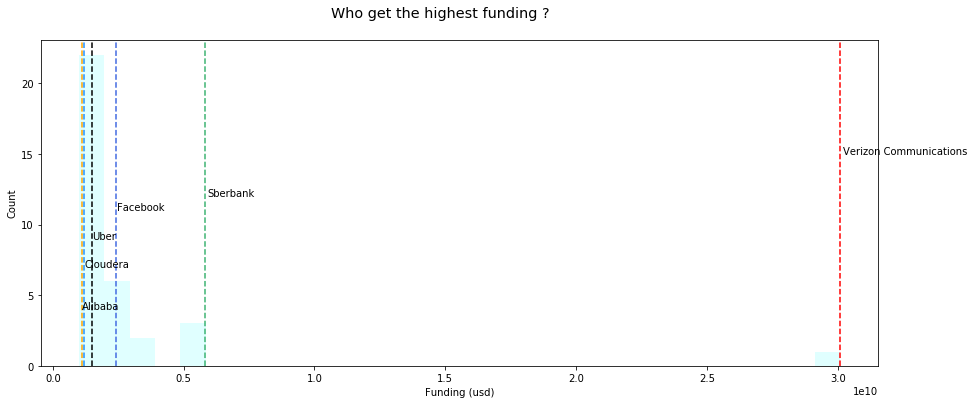

In [34]:
plt.rcParams['figure.figsize'] = 15,6
plt.hist(data['funding_total_usd'][(data['funding_total_usd'] >= 1000000000)].dropna(), bins=30,color = 'lightcyan' )
plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Who get the highest funding ? ", fontdict=None, position= [0.48,1.05], size = 'x-large')

plt.axvline(Facebook_total_funding,color='royalblue',linestyle ="--")
plt.text(Facebook_total_funding+15000000, 11,"Facebook")

plt.axvline(Uber_total_funding,color='black',linestyle ="--")
plt.text(Uber_total_funding+10000000, 9,"Uber")

plt.axvline(Cloudera_total_funding,color='dodgerblue',linestyle ="--")
plt.text(Cloudera_total_funding+10000000, 7,"Cloudera")

plt.axvline(Alibaba_total_funding,color='orange',linestyle ="--")
plt.text(Alibaba_total_funding+10000000, 4,"Alibaba")

plt.axvline(Verizon_total_funding,color='red',linestyle ="--")
plt.text(Verizon_total_funding+100000000, 15,"Verizon Communications")

plt.axvline(Sberbank_total_funding,color='mediumseagreen',linestyle ="--")
plt.text(Sberbank_total_funding+100000000, 12,"Sberbank")


In [35]:
data['founded_at'].head()

0    2012-06-01
1           NaN
2    2012-10-26
3    2011-04-01
4    2014-01-01
Name: founded_at, dtype: object

In [36]:
data['founded_at'] = pd.to_datetime(data['founded_at'], errors = 'coerce' )

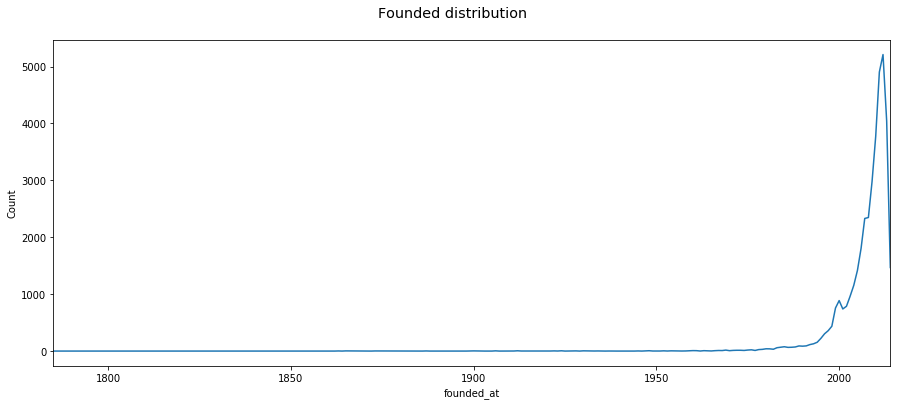

In [37]:
plt.rcParams['figure.figsize'] = 15,6
data['name'].groupby(data["founded_at"].dt.year).count().plot(kind="line")

plt.ylabel('Count')
plt.title("Founded distribution ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [38]:
Facebook_founded_year = data['founded_at'][data['name']=="Facebook"].dt.year.values[0]
Uber_founded_year  = data['founded_at'][data['name']=="Uber"].dt.year.values[0]
Alibaba_founded_year  = data['founded_at'][data['name']=="Alibaba"].dt.year.values[0]

In [39]:
Uber_founded_year

2009

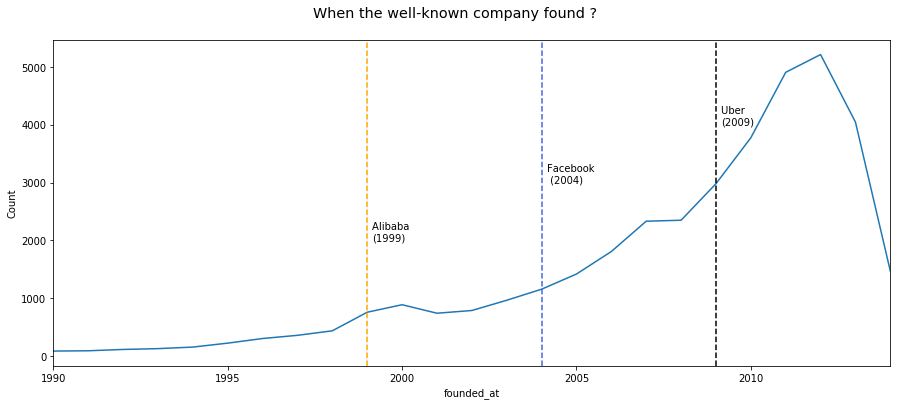

In [40]:
plt.rcParams['figure.figsize'] = 15,6
data['name'][data["founded_at"].dt.year >= 1990].groupby(data["founded_at"].dt.year).count().plot(kind="line")
plt.ylabel('Count')

plt.axvline(Facebook_founded_year,color='royalblue',linestyle ="--")
plt.text(Facebook_founded_year+0.15, 3000,"Facebook \n (2004)")

plt.axvline(Uber_founded_year,color='black',linestyle ="--")
plt.text(Uber_founded_year+0.15, 4000,"Uber \n(2009)")

plt.axvline(Alibaba_founded_year,color='orange',linestyle ="--")
plt.text(Alibaba_founded_year+0.15, 2000,"Alibaba \n(1999)")


plt.title("When the well-known company found ?", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [41]:
len(data['country_code'].unique())

116

In [42]:
data['country_code'].value_counts()[:8]

USA    28793
GBR     2642
CAN     1405
CHN     1239
DEU      968
FRA      866
IND      849
ISR      682
Name: country_code, dtype: int64

In [43]:
data['count'] = 1
country_market = data[['count','country_code','market']].groupby(['country_code','market']).agg({'count': 'sum'})
# Change: groupby state_office and divide by sum
country_market_pct = country_market.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
country_market_pct.reset_index(inplace = True)

In [44]:
USA_market_pct = country_market_pct[country_market_pct['country_code'] == "USA"]
USA_market_pct = USA_market_pct.sort_values('count',ascending = False)[0:10]

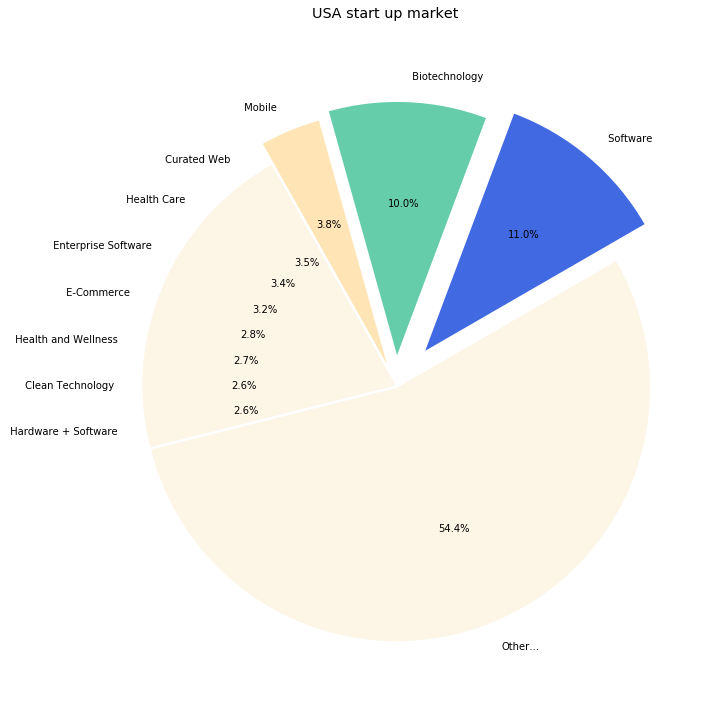

In [45]:
# USA
plt.rcParams['figure.figsize'] =10,10
labels = list(USA_market_pct['market'])+['Other...']
sizes = list(USA_market_pct['count'])+[100-USA_market_pct['count'].sum()]
explode = (0.18, 0.12, 0.09,0,0,0,0,0,0,0,0.01)
colors =  ['royalblue','mediumaquamarine','moccasin'] +['oldlace']*8

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("USA start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()

In [46]:
IND_market_pct = country_market_pct[country_market_pct['country_code'] == "IND"]
IND_market_pct = IND_market_pct.sort_values('count',ascending = False)[0:10]

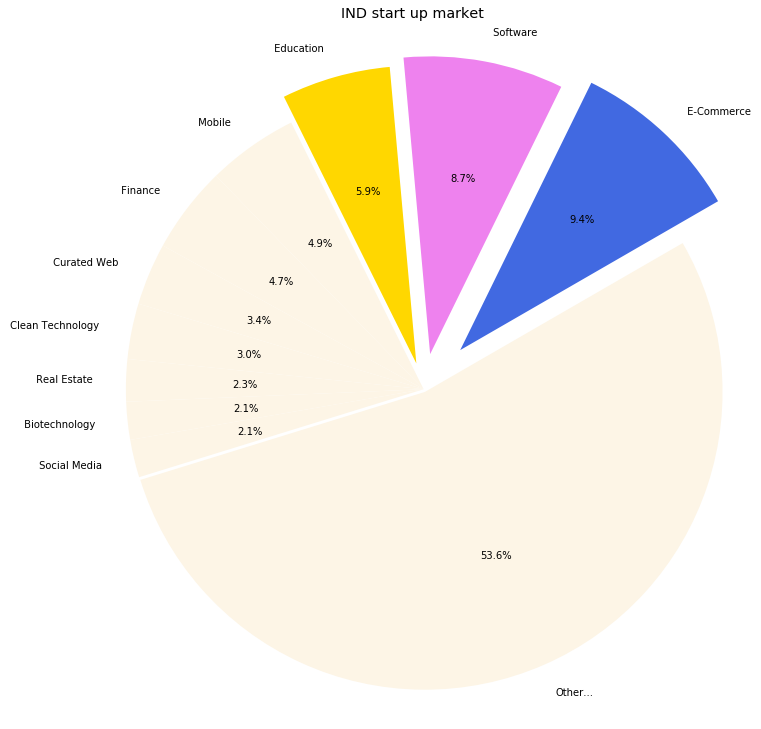

In [47]:
plt.rcParams['figure.figsize'] = 10,10
labels = list(IND_market_pct['market'])+['Other...']
sizes = list(IND_market_pct['count'])+[100-USA_market_pct['count'].sum()]
explode = (0.18, 0.12, 0.09,0,0,0,0,0,0,0,0.01)
colors =  ['royalblue','violet','gold'] +['oldlace']*8

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("IND start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')
plt.show()

In [48]:
funding_information(data,"Dropbox")

Company :  Dropbox
Total Funding :  1107215000.0  $
Seed Funding :  15000.0  $
Angle Funding : 0.0  $
Grant Funding :  0.0  $
Product Crowd Funding :  0.0  $
Equity Crowd Funding :  0.0  $
Undisclode Funding :  0.0  $
Convertible Note :  0.0  $
Debt Financing :  500000000.0  $
Private Equity :  0.0  $
PostIPO Equity :  0.0  $
PostIPO Debt :  0.0  $
Secondary Market :  0.0  $
Venture Funding :  607200000.0  $
Round A funding :  7200000.0  $
Round B funding :  250000000.0  $
Round C funding :  350000000.0  $
Round D funding :  0.0  $
Round E funding :  0.0  $
Round F funding :  0.0  $
Round G funding :  0.0  $
Round H funding :  0.0  $


In [49]:
funding_information(data,"Uber")

Company :  Uber
Total Funding :  1507450000.0  $
Seed Funding :  200000.0  $
Angle Funding : 1250000.0  $
Grant Funding :  0.0  $
Product Crowd Funding :  0.0  $
Equity Crowd Funding :  0.0  $
Undisclode Funding :  0.0  $
Convertible Note :  0.0  $
Debt Financing :  0.0  $
Private Equity :  0.0  $
PostIPO Equity :  0.0  $
PostIPO Debt :  0.0  $
Secondary Market :  0.0  $
Venture Funding :  1506000000.0  $
Round A funding :  11000000.0  $
Round B funding :  37000000.0  $
Round C funding :  258000000.0  $
Round D funding :  1200000000.0  $
Round E funding :  0.0  $
Round F funding :  0.0  $
Round G funding :  0.0  $
Round H funding :  0.0  $


Seed funding is the first official equity funding stage. 
It typically represents the first official money that a business venture or enterprise raises; 
some companies never extend beyond seed funding into Series A rounds or beyond.

In [50]:
data[['name','seed']].head(5)

name       seed
0            #waywire 1750000.00
1  &TV Communications       0.00
2   'Rock' Your Paper   40000.00
3   (In)Touch Network 1500000.00
4  -R- Ranch and Mine       0.00

In [51]:
print("The average of seed funding stage is around ",data['seed'][data['seed'] != 0].mean(), "$")

The average of seed funding stage is around  776350.5418021533 $


In [52]:
data['get_funding_in_seed'] = data['seed'].map(lambda s :1  if s > 0 else 0)

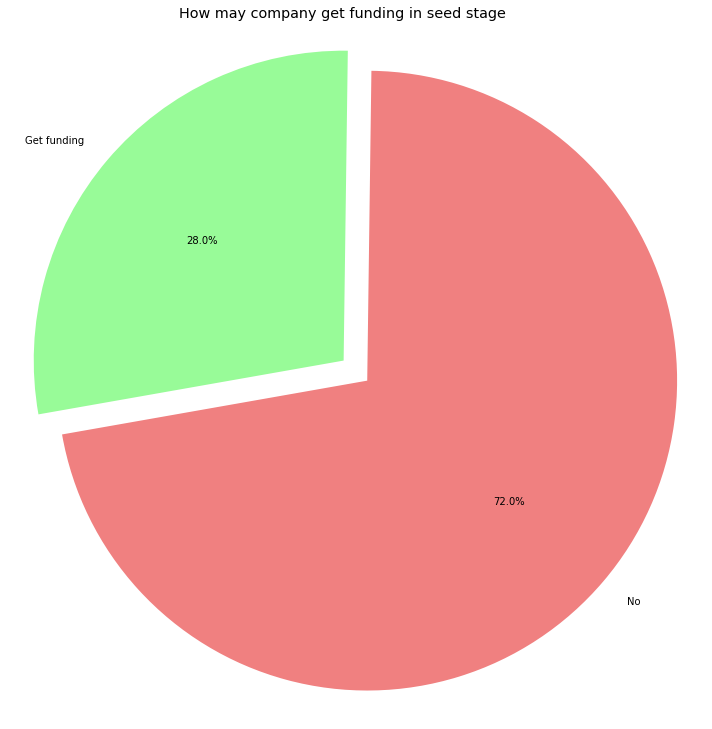

In [53]:
## USA
plt.rcParams['figure.figsize'] =10,10
labels = ['No','Get funding']
sizes = data['get_funding_in_seed'].value_counts().tolist()
explode = (0, 0.1)
colors =  ['lightcoral','palegreen'] 

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
plt.axis('equal')
plt.tight_layout()
plt.title("How may company get funding in seed stage", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()

In [54]:
# Remove Outlier first 

Q1 = data['seed'][data['seed'] != 0].quantile(0.25)
Q3 = data['seed'][data['seed'] != 0].quantile(0.75)
IQR = Q3 - Q1

lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)
without_outlier = data[(data['seed'] > lower_bound ) & (data['seed'] < upper_bound)]

In [55]:
Facebook_seed_funding = data['seed'][data['name']=="Facebook"].values[0]
Uber_seed_funding   = data['seed'][data['name']=="Uber"].values[0]
Dropbox_seed_funding   = data['seed'][data['name']=="Dropbox"].values[0]

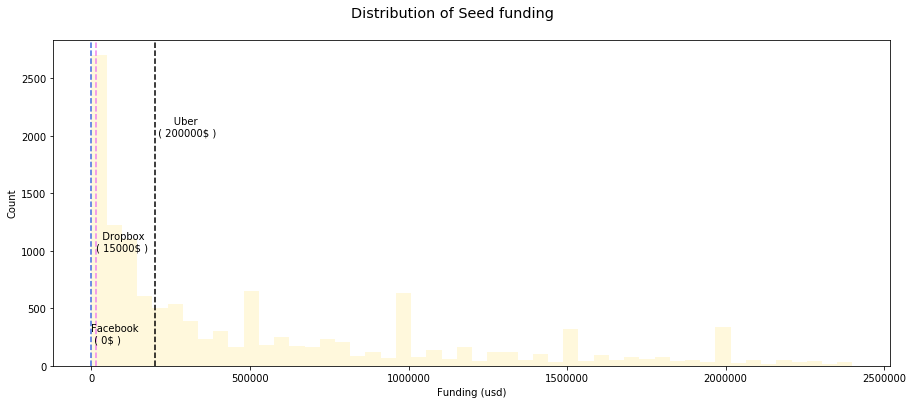

In [56]:
plt.rcParams['figure.figsize'] = 15,6
plt.hist(without_outlier['seed'][without_outlier['seed']!=0].dropna(), bins=50,color = 'cornsilk' )

plt.axvline(Facebook_seed_funding,color='royalblue',linestyle ="--")
plt.text(Facebook_seed_funding+0.15, 200,"Facebook \n ( 0$ )")

plt.axvline(Uber_seed_funding,color='black',linestyle ="--")
plt.text(Uber_seed_funding+0.15, 2000,"      Uber \n ( 200000$ )")

plt.axvline(Dropbox_seed_funding,color='violet',linestyle ="--")
plt.text(Dropbox_seed_funding+0.15, 1000,"  Dropbox \n( 15000$ )")

plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Distribution of Seed funding ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

Who is angel? 

An angel investor (also known as a private investor, seed investor or angel funder) 
is a high net worth individual who provides financial backing for small startups or entrepreneurs,
typically in exchange for ownership equity in the company. Often, angel investors are found among
an entrepreneur's family and friends.
The funds that angel investors provide may be a one-time investment to help the business get off the ground 
or an ongoing injection to support and carry the company through its difficult early stages.

In [57]:
print("The average of Angel funding is around ",data['angel'][data['angel'] != 0].mean(), "$")

The average of Angel funding is around  1033615.6954298498 $


In [58]:
data['get_funding_in_angel'] = data['angel'].map(lambda s :"Get funding"  if s > 0 else "Not get funding")

In [59]:
print("Only " , data['get_funding_in_angel'].value_counts().values[1], " companies has angel investor")
print("while " , data['get_funding_in_angel'].value_counts().values[0], " are not")
print("~",data['get_funding_in_angel'].value_counts().values[1]/(data['get_funding_in_angel'].value_counts().values[1]+data['get_funding_in_angel'].value_counts().values[0]) *100, "percent")

Only  3129  companies has angel investor
while  46308  are not
~ 6.329267552642757 percent


the large majority of successful startups have engaged in many efforts to raise capital through rounds of external funding. These funding rounds provide outside investors the opportunity to invest cash in a growing company in exchange for equity, or partial ownership of that company. When you hear discussions of Series A, Series B, and Series C funding rounds, these terms are referring to this process of growing a business through outside investment.

Series A, B, and C funding rounds are merely stepping stones in the process of turning an ingenious idea into a revolutionary global company, ripe for an IPO.

In [60]:
data['round_A'][data['round_A'] != 0].mean()

6830906.178162835

In [61]:
data['round_B'][data['round_B'] != 0].mean()

13549761.864145402

In [62]:
data['round_C'][data['round_C'] != 0].mean()

21004716.314416636

In [63]:
round_ = ['round_A','round_B','round_C','round_D','round_E','round_F','round_G','round_H']
amount = [data['round_A'][data['round_A'] != 0].mean(),
          data['round_B'][data['round_B'] != 0].mean(),
          data['round_C'][data['round_C'] != 0].mean(),
          data['round_D'][data['round_D'] != 0].mean(),
          data['round_E'][data['round_E'] != 0].mean(),
          data['round_F'][data['round_F'] != 0].mean(),
          data['round_G'][data['round_G'] != 0].mean(),
         data['round_H'][data['round_H'] != 0].mean()]

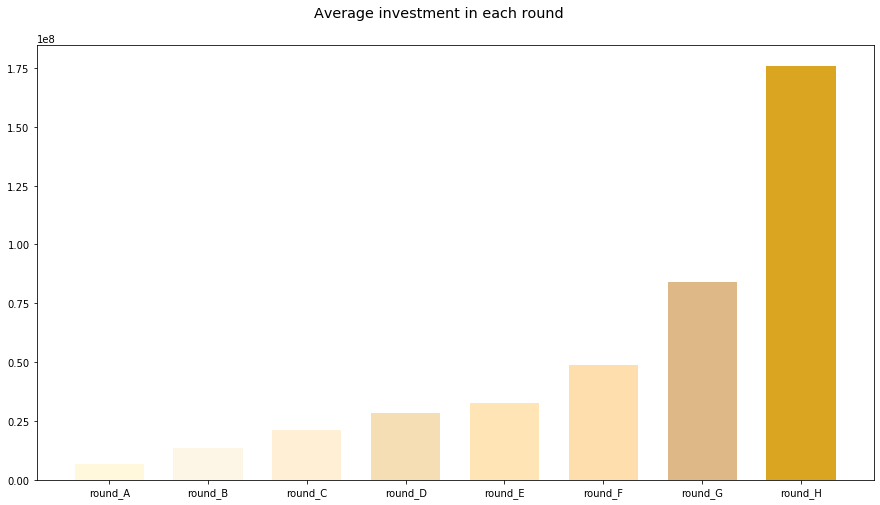

In [64]:
plt.rcParams['figure.figsize'] = 15,8

height = amount
bars =  round_
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7, color= ['cornsilk','oldlace','papayawhip','wheat','moccasin','navajowhite','burlywood','goldenrod'] )
plt.xticks(y_pos, bars)
plt.title("Average investment in each round", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [65]:
print(data.isnull().sum())

permalink                   0
name                        0
homepage_url             3449
category_list            3961
market                   3968
funding_total_usd        8531
status                   1314
country_code             5272
state_code              19276
region                   5272
city                     6115
funding_rounds              0
founded_at              10885
founded_month           10956
founded_quarter         10956
founded_year            10956
first_funding_at            0
last_funding_at             0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
secondary_market            0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C   

In [66]:
data['city']=data['city'].astype('category')

In [67]:
data['city_Types_Cat'] = data['city'].cat.codes
data

permalink  \
0                                  /organization/waywire   
1                        /organization/tv-communications   
2                          /organization/rock-your-paper   
3                         /organization/in-touch-network   
4                         /organization/r-ranch-and-mine   
...                                                  ...   
49433                                /organization/zzish   
49434  /organization/zznode-science-and-technology-co...   
49435                          /organization/zzzzapp-com   
49436                         /organization/a-list-games   
49437                                    /organization/x   

                                name                   homepage_url  \
0                           #waywire         http://www.waywire.com   
1                 &TV Communications          http://enjoyandtv.com   
2                  'Rock' Your Paper   http://www.rockyourpaper.org   
3                  (In)Touch Network  http://www.InTouchNetwork.com   
4                 -R- Ranch and Mine                            NaN   
...                              ...                            ...   
49433                          Zzish           http://www.zzish.com   
49434  ZZNode Science and Technology          http://www.zznode.com   
49435          Zzzzapp Wireless ltd.         http://www.zzzzapp.com   
49436                  [a]list games      http://www.alistgames.com   
49437                          [x+1]       http://www.xplusone.com/   

                                           category_list  \
0             |Entertainment|Politics|Social Media|News|   
1                                                |Games|   
2                                 |Publishing|Education|   
3      |Electronics|Guides|Coffee|Restaurants|Music|i...   
4                          |Tourism|Entertainment|Games|   
...                                                  ...   
49433  |Analytics|Gamification|Developer APIs|iOS|And...   
49434                              |Enterprise Software|   
49435      |Web Development|Advertising|Wireless|Mobile|   
49436                                            |Games|   
49437                              |Enterprise Software|   

                      market  funding_total_usd     status country_code  \
0                      News          1750000.00   acquired          USA   
1                     Games          4000000.00  operating          USA   
2                Publishing            40000.00  operating          EST   
3               Electronics          1500000.00  operating          GBR   
4                   Tourism            60000.00  operating          USA   
...                      ...                ...        ...          ...   
49433             Education           320000.00  operating          GBR   
49434   Enterprise Software          1587301.00  operating          CHN   
49435       Web Development            97398.00  operating          HRV   
49436                 Games          9300000.00  operating          NaN   
49437   Enterprise Software         45000000.00  operating          USA   

      state_code         region  ... round_C  round_D round_E round_F round_G  \
0             NY  New York City  ...    0.00     0.00    0.00    0.00    0.00   
1             CA    Los Angeles  ...    0.00     0.00    0.00    0.00    0.00   
2            NaN        Tallinn  ...    0.00     0.00    0.00    0.00    0.00   
3            NaN         London  ...    0.00     0.00    0.00    0.00    0.00   
4             TX         Dallas  ...    0.00     0.00    0.00    0.00    0.00   
...          ...            ...  ...     ...      ...     ...     ...     ...   
49433        NaN         London  ...    0.00     0.00    0.00    0.00    0.00   
49434        NaN        Beijing  ...    0.00     0.00    0.00    0.00    0.00   
49435        NaN          Split  ...    0.00     0.00    0.00    0.00    0.00   
49436        NaN            NaN  ...    0

In [68]:
data['city_Types_Cat']

0        2547
1        2098
2        3645
3        2085
4        1234
         ... 
49433    2085
49434     264
49435    3504
49436      -1
49437    2547
Name: city_Types_Cat, Length: 49437, dtype: int16

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
labelencoder = LabelEncoder()

In [71]:
type(data['market'])

pandas.core.series.Series

In [72]:
data['market'].to_string()

'0                                          News \n1                                         Games \n2                                    Publishing \n3                                   Electronics \n4                                       Tourism \n5                                      Software \n6                                   Advertising \n7                                   Curated Web \n8                                      Software \n9                                         Games \n10                                   E-Commerce \n11                                     Software \n12                          Health and Wellness \n13                          Health and Wellness \n14                                  Real Estate \n15                                    Education \n16                                   E-Commerce \n17                                       Search \n18                                 Marketplaces \n19                                  Curated Web \

In [73]:
from sklearn import tree

In [74]:
y=amount

In [75]:
clf = tree.DecisionTreeClassifier()

In [76]:
## select only data which name is not null

data = data[~data.name.isna()]

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score

In [78]:
# Choosing the most suitable columns for our study
investments = data[['name', 'market',
       'funding_total_usd', 'status', 'country_code', 'region',
       'city', 'funding_rounds', 'founded_at','first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']]

In [79]:

investments = investments.set_index('country_code')

In [80]:
# Using the Pandas loc function to access specific labelled rows and columns 
investments = investments.loc[['IND'], :]

In [81]:

investments.sample(10)

name                   market  \
country_code                                                  
IND                   PressConnect                    News    
IND                  Pepperfry.com              E-Commerce    
IND                       Soci Ads              Networking    
IND                      RailYatri                    Apps    
IND                    Brandpotion             Advertising    
IND                VoxPop Clothing              E-Commerce    
IND                     MyParichay   Facebook Applications    
IND               Ecozen Solutions        Clean Technology    
IND           Micromax Informatics                  Mobile    
IND                     LocalBanya             Curated Web    

              funding_total_usd     status     region       city  \
country_code                                                       
IND                   500000.00     closed  Bangalore  Bangalore   
IND                 28000000.00  operating     Mumbai     Mumbai   
IND                    50000.00  operating     Mumbai     Mumbai   
IND                   486000.00  operating  New Delhi      Noida   
IND                         nan  operating     Mumbai     Mumbai   
IND                  1000000.00  operating     Mumbai     Mumbai   
IND                   250000.00  operating  Bangalore  Bangalore   
IND                         nan  operating     Nagpur     Nagpur   
IND                 88000000.00  operating  New Delhi    Gurgaon   
IND                  5000000.00  operating     Mumbai     Mumbai   

              funding_rounds founded_at first_funding_at last_funding_at  ...  \
country_code                                                              ...   
IND                     1.00 2012-01-01       2012-01-01      2012-01-01  ...   
IND                     3.00 2011-01-01       2011-12-12      2014-05-27  ...   
IND                     1.00 2011-01-11       2011-01-11      2011-01-11  ...   
IND                     1.00        NaT       2014-11-20      2014-11-20  ...   
IND                     1.00 2009-01-01       2009-01-01      2009-01-01  ...   
IND                     2.00 2013-04-01       2013-11-20      2014-11-14  ...   
IND                     1.00 2012-04-01       2011-10-01      2011-10-01  ...   
IND                     1.00 2010-09-20       2013-12-12      2013-12-12  ...   
IND                     2.00 1991-01-01       2010-01-12      2010-09-20  ...   
IND                     1.00 2012-05-01       2014-01-09      2014-01-09  ...   

              secondary_market  product_crowdfunding    round_A    round_B  \
country_code                                                                 
IND                       0.00                  0.00       0.00       0.00   
IND                       0.00                  0.00 5000000.00 8000000.00   
IND                       0.00                  0.00       0.00       0.00   
IND                       0.00                  0.00       0.00       0.00   
IND                       0.00                  0.00       0.00       0.00   
IND                       0.00                  0.00       0.00       0.00   
IND                       0.00                  0.00       0.00       0.00   
IND                       0.00                  0.00       0.00       0.00   
IND                       0.00                  0.00       0.00       0.00   
IND                       0.00                  0.00 5000000.00       0.00   

                 round_C  round_D  round_E  round_F  round_G  round_H  
country_code                                                           
IND                 0.00     0.00     0.00     0.00     0.00     0.00  
IND          15000000.00     0.00     0.00     0.00     0.00     0.00  
IND                 0.00     0.00     0.00     0.00     0.00     0.00  
IND                 0.00     0.00     0.00     0.00     0.00     0.00  
IND                 0.00     0.00     0.00     0.00     0.00     0.00  
IND                 0.00     0.00     0.00

In [82]:
investments['round_F'].unique()
# We were interested in seeing whether there is much - or any - useful data in round_F - or, actually, after round_C

array([0.000e+00, 2.100e+08, 9.000e+07, 1.337e+08])

In [83]:
investments.head()

name        market  funding_total_usd     status  \
country_code                                                              
IND                  1CLICK         Chat                 nan  operating   
IND              21Diamonds   E-Commerce          6369507.00  operating   
IND           24x7 Learning    Education          4000000.00  operating   
IND                   3DSoC       Mobile          2065000.00  operating   
IND               91Mobiles       Mobile          1000000.00  operating   

                 region       city  funding_rounds founded_at  \
country_code                                                    
IND           Bangalore  Bangalore            1.00 2012-11-01   
IND           New Delhi    Gurgaon            1.00 2012-06-01   
IND           Bangalore  Bangalore            1.00 2001-01-01   
IND           Bangalore  Bangalore            2.00 2006-06-01   
IND           New Delhi    Gurgaon            1.00 2010-01-01   

             first_funding_at last_funding_at  ...  secondary_market  \
country_code                                   ...                     
IND                2014-01-26      2014-01-26  ...              0.00   
IND                2012-11-15      2012-11-15  ...              0.00   
IND                2007-11-06      2007-11-06  ...              0.00   
IND                2007-12-01      2010-08-01  ...              0.00   
IND                2014-10-29      2014-10-29  ...              0.00   

              product_crowdfunding    round_A   round_B    round_C  round_D  \
country_code                                                                  
IND                           0.00       0.00      0.00       0.00     0.00   
IND                           0.00       0.00      0.00 6369507.00     0.00   
IND                           0.00       0.00      0.00       0.00     0.00   
IND                           0.00 1240000.00 825000.00       0.00     0.00   
IND                           0.00 1000000.00      0.00       0.00     0.00   

              round_E  round_F  round_G  round_H  
country_code                                      
IND              0.00     0.00     0.00     0.00  
IND              0.00     0.00     0.00     0.00  
IND              0.00     0.00     0.00     0.00  
IND              0.00     0.00     0.00     0.00  
IND              0.00     0.00     0.00     0.00  

[5 rows x 31 columns]

In [84]:
investments.reset_index()

country_code           name            market  funding_total_usd  \
0            IND         1CLICK             Chat                 nan   
1            IND     21Diamonds       E-Commerce          6369507.00   
2            IND  24x7 Learning        Education          4000000.00   
3            IND          3DSoC           Mobile          2065000.00   
4            IND      91Mobiles           Mobile          1000000.00   
..           ...            ...               ...                ...   
844          IND  ZoomCar India   Transportation         10900000.00   
845          IND     Zoomin.com      Curated Web         21500000.00   
846          IND        Zoutons       E-Commerce          3300000.00   
847          IND          Zumbl    Entertainment           140000.00   
848          IND          Zuvvu      Advertising            12000.00   

        status     region       city  funding_rounds founded_at  \
0    operating  Bangalore  Bangalore            1.00 2012-11-01   
1    operating  New Delhi    Gurgaon            1.00 2012-06-01   
2    operating  Bangalore  Bangalore            1.00 2001-01-01   
3    operating  Bangalore  Bangalore            2.00 2006-06-01   
4    operating  New Delhi    Gurgaon            1.00 2010-01-01   
..         ...        ...        ...             ...        ...   
844  operating  Bangalore  Bangalore            4.00 2012-01-01   
845  operating     Mumbai     Mumbai            3.00 2007-05-01   
846  operating  New Delhi  New Delhi            1.00 2013-01-01   
847  operating  New Delhi    Gurgaon            3.00 2012-11-01   
848     closed  Ahmedabad  Ahmadabad            1.00 2010-06-01   

    first_funding_at  ... secondary_market  product_crowdfunding    round_A  \
0         2014-01-26  ...             0.00                  0.00       0.00   
1         2012-11-15  ...             0.00                  0.00       0.00   
2         2007-11-06  ...             0.00                  0.00       0.00   
3         2007-12-01  ...             0.00                  0.00 1240000.00   
4         2014-10-29  ...             0.00                  0.00 1000000.00   
..               ...  ...              ...                   ...        ...   
844       2013-04-01  ...             0.00                  0.00 8000000.00   
845       2008-01-01  ...             0.00                  0.00       0.00   
846       2013-09-06  ...             0.00                  0.00       0.00   
847       2013-04-03  ...             0.00                  0.00       0.00   
848       2011-11-01  ...             0.00                  0.00       0.00   

      round_B    round_C  round_D  round_E  round_F  round_G  round_H  
0        0.00       0.00     0.00     0.00     0.00     0.00     0.00  
1        0.00 6369507.00     0.00     0.00     0.00     0.00     0.00  
2        0.00       0.00     0.00     0.00     0.00     0.00     0.00  
3   825000.00       0.00     0.00     0.00     0.00     0.00     0.00  
4        0.00       0.00     0.00     0.00     0.00     0.00     0.00  
..        ...        ...      ...      ...      ...      ...      ...  
844      0.00       0.00     0.00     0.00     0.00     0.00     0.00  
845      0.00       0.00     0.00     0.00     0.00     0.00     0.00  
846      0.00       0.00     0.00     0.00     0.00     0.00     0.00  
847      0.00       0.00     0.00     0.00     0.00     0.00     0.00  
848      0.00       0.00     0.00     0.00     0.00     0.00     0.00  

[849 rows x 32 columns]

In [85]:
#cleaning column names and reformatting the data
#Column names had some empty spaces
investments.columns = investments.columns.str.replace(' ','')

In [86]:
#removed the commas from the total funding
#investments.funding_total_usd = investments.funding_total_usd.str.replace(', ',',')

In [87]:
#it was string, now it is a float.
investments.funding_total_usd = pd.to_numeric(investments.funding_total_usd, errors='coerce')

In [88]:
# changing the data type for column founded_at to datetime type
investments['founded_at'] = pd.to_datetime(investments['founded_at'], errors = 'coerce' )

In [89]:
investments['market'] = pd.Series.to_string(investments['market'])#, errors = 'coerce' )

In [90]:
# changing the data type for column first_funding_at to datetime type
investments.first_funding_at = pd.to_datetime(investments.first_funding_at, format='%Y/%m/%d', errors='coerce')

In [91]:
# changing the data type for column first_funding_at to datetime type
investments.first_funding_at = pd.to_datetime(investments.first_funding_at, format='%Y/%m/%d', errors='coerce')

In [92]:
# Now we can groupby country code.
investments.groupby('country_code').mean()

funding_total_usd  funding_rounds      seed     venture  \
country_code                                                            
IND                 23346361.96            1.40 113389.91 10161312.14   

              equity_crowdfunding  undisclosed  convertible_note  \
country_code                                                       
IND                          9.42    165433.79           5219.08   

              debt_financing    angel    grant  ...  secondary_market  \
country_code                                    ...                     
IND               3203970.68 44147.23 30600.71  ...            247.35   

              product_crowdfunding   round_A    round_B   round_C   round_D  \
country_code                                                                  
IND                         294.46 767742.24 1333211.70 792630.71 895170.79   

               round_E   round_F    round_G   round_H  
country_code                                           
IND          718492.34 510836.28 1248527.68 706713.78  

[1 rows x 23 columns]

In [93]:
# rounding the values of the data frame to 4 decimal places
investments= investments.round(4)
investments

name  \
country_code                  
IND                  1CLICK   
IND              21Diamonds   
IND           24x7 Learning   
IND                   3DSoC   
IND               91Mobiles   
...                     ...   
IND           ZoomCar India   
IND              Zoomin.com   
IND                 Zoutons   
IND                   Zumbl   
IND                   Zuvvu   

                                                         market  \
country_code                                                      
IND           country_code\nIND                             ...   
IND           country_code\nIND                             ...   
IND           country_code\nIND                             ...   
IND           country_code\nIND                             ...   
IND           country_code\nIND                             ...   
...                                                         ...   
IND           country_code\nIND                             ...   
IND           country_code\nIND                             ...   
IND           country_code\nIND                             ...   
IND           country_code\nIND                             ...   
IND           country_code\nIND                             ...   

              funding_total_usd     status     region       city  \
country_code                                                       
IND                         nan  operating  Bangalore  Bangalore   
IND                  6369507.00  operating  New Delhi    Gurgaon   
IND                  4000000.00  operating  Bangalore  Bangalore   
IND                  2065000.00  operating  Bangalore  Bangalore   
IND                  1000000.00  operating  New Delhi    Gurgaon   
...                         ...        ...        ...        ...   
IND                 10900000.00  operating  Bangalore  Bangalore   
IND                 21500000.00  operating     Mumbai     Mumbai   
IND                  3300000.00  operating  New Delhi  New Delhi   
IND                   140000.00  operating  New Delhi    Gurgaon   
IND                    12000.00     closed  Ahmedabad  Ahmadabad   

              funding_rounds founded_at first_funding_at last_funding_at  ...  \
country_code                                                              ...   
IND                     1.00 2012-11-01       2014-01-26      2014-01-26  ...   
IND                     1.00 2012-06-01       2012-11-15      2012-11-15  ...   
IND                     1.00 2001-01-01       2007-11-06      2007-11-06  ...   
IND                     2.00 2006-06-01       2007-12-01      2010-08-01  ...   
IND                     1.00 2010-01-01       2014-10-29      2014-10-29  ...   
...                      ...        ...              ...             ...  ...   
IND                     4.00 2012-01-01       2013-04-01      2014-10-31  ...   
IND                     3.00 2007-05-01       2008-01-01      2014-08-29  ...   
IND                     1.00 2013-01-01       2013-09-06      2013-09-06  ...   
IND                     3.00 2012-11-01       2013-04-03      2014-04-05  ...   
IND                     1.00 2010-06-01       2011-11-01      2011-11-01  ...   

              secondary_market  product_crowdfunding    round_A   round_B  \
country_code                                                                
IND                       0.00                  0.00       0.00      0.00   
IND                       0.00                  0.00       0.00      0.00   
IND                       0.00                  0.00       0.00      0.00   
IND                       0.00                  0.00 1240000.00 825000.00   
IND                       0.00                  0.00 1000000.00      0.00   
...                        ...                   ...        ...       ...   
IND                       0.00                  0.00 8000000.00      0.00   
IND                       0.00                  0.00       0.00      0.00   
IND                       0.00        

In [94]:
# We discuss whether to keep the region column instead of the city column, 
# as 'region' is clearer and less complex when we run data analysis

investments['region'].unique()

array(['Bangalore', 'New Delhi', 'Vadodara', 'Mumbai', 'IND - Other',
       'Chandigarh', 'Hyderabad', 'Coimbatore', 'Bhubaneswar', 'Pune',
       'Kolkata', 'Jaipur', 'Chennai', 'Ahmedabad', 'Guwahati', 'Goa',
       'Mangalore', 'Delhi', 'Cochin', 'Ghaziabad', 'Trivandrum',
       'Haryana', 'Faridabad', 'Nagpur', 'Vijayawada', 'Mysore',
       'Vellore', 'Secunderabad', 'Madhapur', 'Tamil Nadu', 'Indore',
       'Kochi', 'Andhra Pradesh', 'Mohali', 'Thiruvananthapuram', 'Thane',
       'Aurangabad', 'Ernakulam', 'Uttar Pradesh', 'Jabalpur', 'Madurai',
       'Ludhiana', 'Belgaum', 'Jodhpur'], dtype=object)

In [95]:
# So, our option would be to drop the city column as it DOES ADD lots of complex data when we run data analysis

investments['city'].unique()

[Bangalore, Gurgaon, Vadodara, Mumbai, Tirupur, ..., Varanasi, Ludhiana, Belgaum, Jodhpur, Ahmadabad]
Length: 69
Categories (68, object): [Bangalore, Gurgaon, Vadodara, Mumbai, ..., Ludhiana, Belgaum, Jodhpur, Ahmadabad]

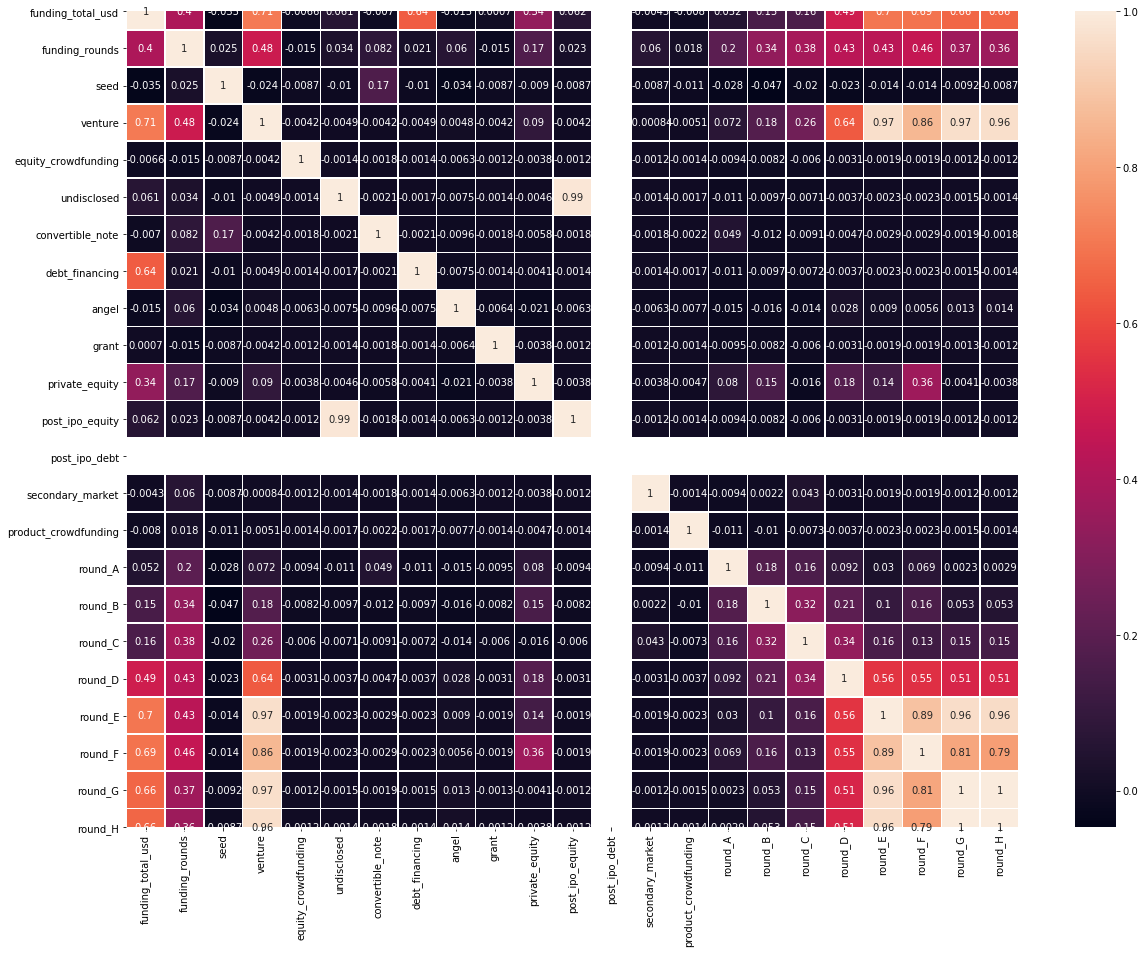

In [96]:
plt.subplots(figsize=(20,15))

sns.heatmap(investments.corr(), annot=True, linewidth=0.5);

# This heat map serves to give us a bigger picture of our investments data.

In [97]:
# Ungroup dataset

investments = investments.reset_index(level='country_code')

In [98]:
# Top 10 startup status based on market sector

operating = investments[investments.status == 'operating']
acquired = investments[investments.status == 'acquired']
closed = investments[investments.status == 'closed']

In [99]:
operating_count  = operating['market'].value_counts()
operating_count = operating_count[:10,]

print('Operating')
print(operating_count)

Operating
country_code\nIND                             Chat \nIND                       E-Commerce \nIND                        Education \nIND                           Mobile \nIND                           Mobile \nIND                       E-Commerce \nIND                         Software \nIND                          Finance \nIND                           Retail \nIND                      Advertising \nIND              Mining Technologies \nIND                      Curated Web \nIND                           Mobile \nIND                      Health Care \nIND                      Classifieds \nIND                               NaN\nIND                             Apps \nIND                         Big Data \nIND                      Advertising \nIND               Finance Technology \nIND                        Analytics \nIND                        Education \nIND                           Mobile \nIND                       Consulting \nIND                           Retail \nI

In [100]:
acquired_count  = acquired['market'].value_counts()
acquired_count = acquired_count[:10,]

print('Acquired')
print(acquired_count)

Acquired
country_code\nIND                             Chat \nIND                       E-Commerce \nIND                        Education \nIND                           Mobile \nIND                           Mobile \nIND                       E-Commerce \nIND                         Software \nIND                          Finance \nIND                           Retail \nIND                      Advertising \nIND              Mining Technologies \nIND                      Curated Web \nIND                           Mobile \nIND                      Health Care \nIND                      Classifieds \nIND                               NaN\nIND                             Apps \nIND                         Big Data \nIND                      Advertising \nIND               Finance Technology \nIND                        Analytics \nIND                        Education \nIND                           Mobile \nIND                       Consulting \nIND                           Retail \nIN

In [101]:
# Most funded startups/companies in INDIA
most_funded = investments.nlargest(20, ['funding_total_usd'])
most_funded

country_code                              name  \
251          IND                          Flipkart   
604          IND        Reliance Jio Infocomm Ltd.   
671          IND                          Snapdeal   
288          IND                         GMR Group   
312          IND                             Haier   
745          IND                      Tower Vision   
538          IND  Ola (ANI Technologies Pvt. Ltd.)   
605          IND                       ReNew Power   
301          IND                     Greenko Group   
286          IND                      Gland Pharma   
413          IND                  Kalyan Jewellers   
590          IND                       Quikr India   
509          IND                            Myntra   
58           IND                           Avantha   
336          IND                       Housing.com   
104          IND               CaptureSolar Energy   
591          IND             Quippo Infrastructure   
825          IND                    Ybrant Digital   
404          IND                            Jasper   
12           IND                           Acision   

                                                market  funding_total_usd  \
251  country_code\nIND                             ...      2351140000.00   
604  country_code\nIND                             ...      2250000000.00   
671  country_code\nIND                             ...      1062700000.00   
288  country_code\nIND                             ...       398350000.00   
312  country_code\nIND                             ...       364000000.00   
745  country_code\nIND                             ...       300000000.00   
538  country_code\nIND                             ...       276830000.00   
605  country_code\nIND                             ...       275000000.00   
301  country_code\nIND                             ...       241983286.00   
286  country_code\nIND                             ...       200000000.00   
413  country_code\nIND                             ...       200000000.00   
590  country_code\nIND                             ...       196000000.00   
509  country_code\nIND                             ...       158750000.00   
58   country_code\nIND                             ...       150000000.00   
336  country_code\nIND                             ...       139500000.00   
104  country_code\nIND                             ...       125000000.00   
591  country_code\nIND                             ...       113300000.00   
825  country_code\nIND                             ...       103000000.00   
404  country_code\nIND                             ...       102000000.00   
12   country_code\nIND                             ...       100000000.00   

        status       region       city  funding_rounds founded_at  \
251  operating    Bangalore  Bangalore           11.00 2007-09-01   
604  operating       Mumbai     Mumbai            2.00 2007-01-01   
671  operating    New Delhi  New Delhi            8.00 2010-01-01   
288  operating    Bangalore  Bangalore            1.00 1978-01-01   
312  operating    New Delhi  New Delhi            1.00        NaT   
745  operating      Chennai    Chennai            1.00        NaT   
538  operating    Bangalore  Bangalore            5.00 2010-12-03   
605  operating    New Delhi    Gurgaon            2.00 2011-01-01   
301  operating    Hyderabad  Hyderabad            2.00        NaT   
286  operating    Hyderabad  Hyderabad            1.00        NaT   
413  operating  IND - Other        NaN            1.00 1993-01-01   
590  operating       Mumbai     Mumbai            5.00 2008-01-12   
509        NaN    Bangalore  Bangalore            9.00 2007-01-01   
58   operating    New Delhi  New Delhi            1.00        NaT   
336  operating       Mumbai     Mumbai            4.00 2012-06-07   
104  operating         Pune       Pune            1.00 2013-01-01   
591  operating    New Delhi  New Delhi            1.00        NaT   
825  oper

In [102]:
 #Total number of INDIAN startups per market/industry with more than 1 million USD investment

most_high= investments[['market', 'name']][investments['funding_total_usd'] > 1000000].groupby(['market'], 
                                        as_index=False).count().sort_values('name', ascending=False)
most_high.head(20)
top20 = most_high.head(20)
top20

market  name
0  country_code\nIND                             ...   379

In [103]:
INDS = sns.catplot(x="market", y="name",  kind="bar", data=top20, height=5.27, aspect=11.7/5.27)
INDS.set_xticklabels(rotation=45, horizontalalignment='right')

Text(0.5, 1.0, "Startups's,grant and debt_financing in  INDIA by region")

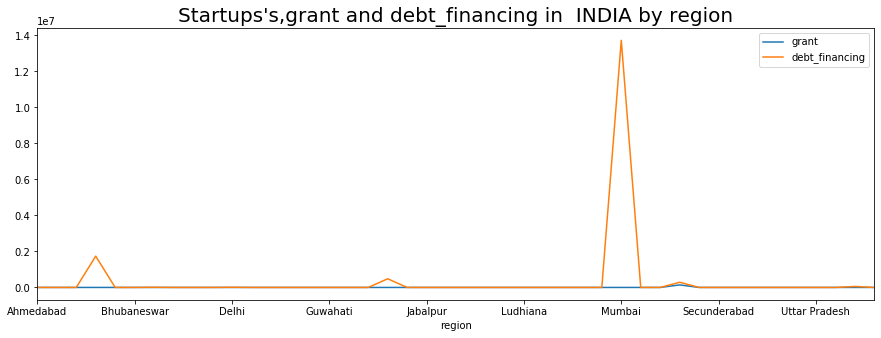

In [104]:
# The average funding from grant and debt_financing in INDIA by region

gbf=investments[(investments['country_code'] == 'IND')]
rg= gbf.groupby('region').mean()
fr=rg.plot(kind ='line', y=['grant','debt_financing'], figsize=(15,5))

fr.set_title('Startups\'s,grant and debt_financing in  INDIA by region',fontsize=(20))

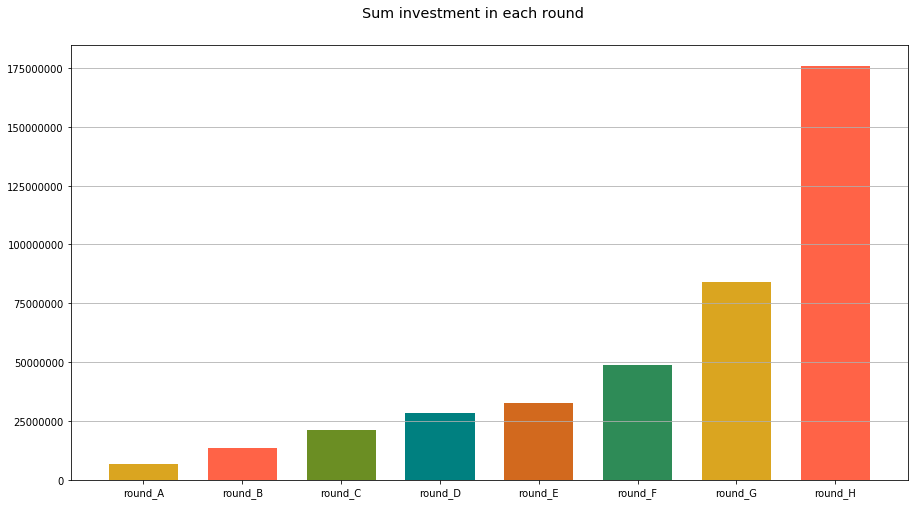

In [105]:
plt.rcParams['figure.figsize'] = 15,8
height = amount
bars =  round_
y_pos = np.arange(len(bars))

plt.bar(y_pos, height , width=0.7, color= ['goldenrod','tomato','olivedrab','teal','chocolate','seagreen'] )
plt.ticklabel_format(style = 'plain')
plt.xticks(y_pos, bars)
ax = plt.axes()        
ax.yaxis.grid()
plt.title("Sum investment in each round", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [106]:
investments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 32 columns):
country_code            849 non-null object
name                    849 non-null object
market                  849 non-null object
funding_total_usd       643 non-null float64
status                  832 non-null object
region                  849 non-null object
city                    844 non-null category
funding_rounds          849 non-null float64
founded_at              683 non-null datetime64[ns]
first_funding_at        849 non-null datetime64[ns]
last_funding_at         849 non-null object
seed                    849 non-null float64
venture                 849 non-null float64
equity_crowdfunding     849 non-null float64
undisclosed             849 non-null float64
convertible_note        849 non-null float64
debt_financing          849 non-null float64
angel                   849 non-null float64
grant                   849 non-null float64
private_equity          849 non

In [107]:
x = investments[['city']]

In [108]:
y=investments['funding_total_usd']

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [110]:
clf = tree.DecisionTreeClassifier()

ValueError: could not convert string to float: 'Mumbai'